In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/content/Employee.csv')
print(data)

X = data.drop(columns=["LeaveOrNot"])
y = data["LeaveOrNot"]

features = ["Education", "City", "Gender", "EverBenched"]
for col in features:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from sklearn.linear_model import Perceptron

perceptron_classifier = Perceptron(max_iter=100, random_state=42)
perceptron_classifier.fit(X_train, y_train)
perceptron_predictions = perceptron_classifier.predict(X_test)


from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)


from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
logistic_predictions = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)


from sklearn.metrics import accuracy_score, classification_report

perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nPerceptron Accuracy:", perceptron_accuracy)
print("\nPerceptron Classification Report:\n", classification_report(y_test, perceptron_predictions))


print("\nSVM Accuracy:", svm_accuracy)
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))


print("\nLogistic Regression Accuracy:", logistic_accuracy)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))


import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = pd.read_csv('/content/Employee.csv')


X = data[['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']]
y = data['LeaveOrNot']


n_bootstraps = 100


k_neighbors = 5


knn_models = []
accuracies = []

from sklearn.utils import resample


for i in range(n_bootstraps):
    X_bootstrap, y_bootstrap = resample(X, y, replace=True, random_state=i)

    X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=k_neighbors)
    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    knn_models.append(knn)


average_accuracy = np.mean(accuracies)



print(f'KNN Average Accuracy: {average_accuracy}')



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
num_bootstraps = 100
results_perceptron = []
results_svm = []
results_logistic = []
for _ in range(num_bootstraps):
    X_train_boot, y_train_boot = resample(X_train, y_train, random_state=42)
    perceptron_classifier = Perceptron(max_iter=100, random_state=42)
    perceptron_classifier.fit(X_train_boot, y_train_boot)
    perceptron_predictions = perceptron_classifier.predict(X_test)
    perceptron_accuracy = accuracy_score(y_test, perceptron_predictions)
    results_perceptron.append(perceptron_accuracy)

    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(X_train_boot, y_train_boot)
    svm_predictions = svm_classifier.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    results_svm.append(svm_accuracy)

    logistic_classifier = LogisticRegression()
    logistic_classifier.fit(X_train_boot, y_train_boot)
    logistic_predictions = logistic_classifier.predict(X_test)
    logistic_accuracy = accuracy_score(y_test, logistic_predictions)
    results_logistic.append(logistic_accuracy)
mean_perceptron_accuracy = np.mean(results_perceptron)
mean_svm_accuracy = np.mean(results_svm)
mean_logistic_accuracy = np.mean(results_logistic)
print(f"Perceptron Bootstrapping Mean Accuracy: {mean_perceptron_accuracy:.2f} ")
print(f"SVM Bootstrapping Mean Accuracy: {mean_svm_accuracy:.2f}")
print(f"Logistic Regression Bootstrapping Mean Accuracy: {mean_logistic_accuracy:.2f} ")



      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

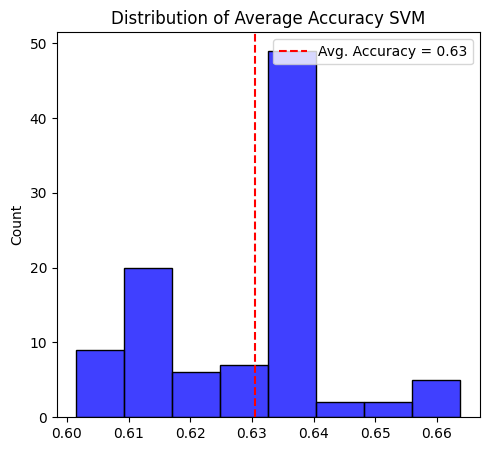

Average Accuracy: 63.05048335123522


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

num_samples = 100
all_predictions = []
accuracies = []

for i in range(num_samples):
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 1000))

    model = SVC(kernel='linear')
    model.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    all_predictions.append(y_pred)
    accuracies.append(accuracy)

average_predictions = np.mean(all_predictions, axis=0)
svm_accuracy = np.mean(accuracies)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(accuracies, color='blue')
plt.axvline(svm_accuracy, color='red', linestyle='--', label=f'Avg. Accuracy = {svm_accuracy:.2f}')
plt.title("Distribution of Average Accuracy SVM")
plt.legend()
plt.show()
print("Average Accuracy:", svm_accuracy * 100)


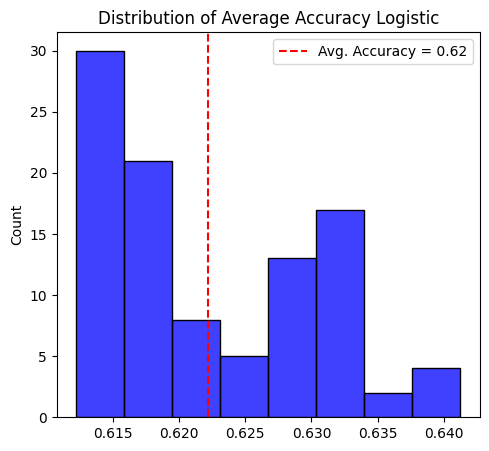

Average Accuracy: 62.22234156820623


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns

num_samples = 100
all_predictions = []
accuracies = []

for i in range(num_samples):
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 1000))

    model = LogisticRegression()
    model.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    all_predictions.append(y_pred)
    accuracies.append(accuracy)

average_predictions = np.mean(all_predictions, axis=0)
logistic_accuracy = np.mean(accuracies)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.histplot(accuracies, color='blue')
plt.axvline(logistic_accuracy, color='red', linestyle='--', label=f'Avg. Accuracy = {logistic_accuracy:.2f}')
plt.title("Distribution of Average Accuracy Logistic")
plt.legend()

plt.show()

print("Average Accuracy:", logistic_accuracy * 100)


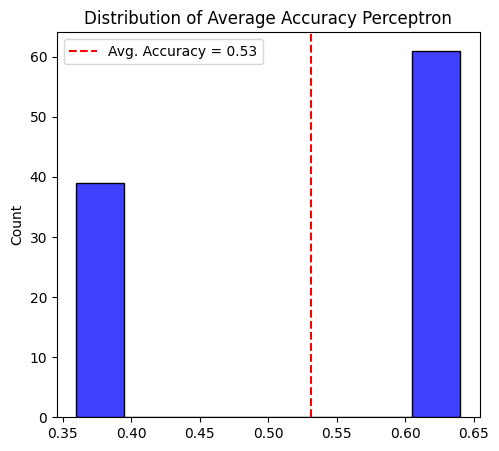

Average Accuracy: 53.08378088077338


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
import seaborn as sns

num_samples = 100
all_predictions=[]
accuracies=[]

for i in range(num_samples):
    x_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 1000))

    # 3. Model Training
    model = Perceptron()
    model.fit(x_train_bootstrap, y_train_bootstrap)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    all_predictions.append(y_pred)
    accuracies.append(accuracy)


average_predictions = np.mean(all_predictions, axis=0)
perceptron_accuracy = np.mean(accuracies)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.histplot(accuracies, color='blue')
plt.axvline(perceptron_accuracy, color='red', linestyle='--', label=f'Avg. Accuracy = {perceptron_accuracy:.2f}')
plt.title("Distribution of Average Accuracy Perceptron")
plt.legend()

plt.show()

print("Average Accuracy:", perceptron_accuracy * 100)

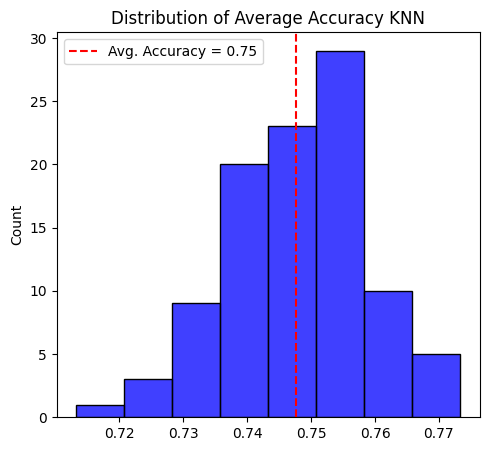

Average Accuracy: 74.75832438238453


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

num_samples = 100
all_predictions = []
accuracies = []

for i in range(num_samples):
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 10000))

    k = 5
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_bootstrap, y_train_bootstrap)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    all_predictions.append(y_pred)
    accuracies.append(accuracy)

average_predictions = np.mean(all_predictions, axis=0)
knn_accuracy = np.mean(accuracies)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(accuracies, color='blue')
plt.axvline(knn_accuracy, color='red', linestyle='--', label=f'Avg. Accuracy = {knn_accuracy:.2f}')
plt.title("Distribution of Average Accuracy KNN")
plt.legend()
plt.show()
print("Average Accuracy:", knn_accuracy * 100)


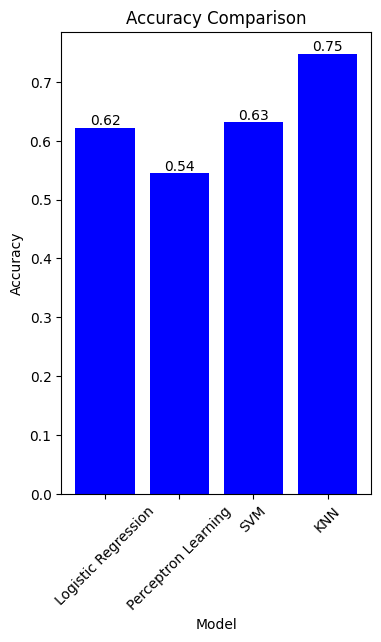

In [ ]:
names = ['Logistic Regression', 'Perceptron Learning', 'SVM', 'KNN']
values = [logistic_accuracy, perceptron_accuracy, svm_accuracy, knn_accuracy]

plt.figure(figsize=(4,6))

bars = plt.bar(names, values, color='blue',linewidth=0.2)
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add text labels for each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom')
plt.xticks(rotation=45)

plt.show()